In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Load cleaned weather data
df = pd.read_csv("cleaned_weather_data.csv")

# Filter numeric columns and remove 'Cloud Coverage'
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['Cloud Coverage'], errors='ignore')

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

In [15]:
# Take a random sample of data for hierarchical clustering
sample_df = numeric_df.sample(n=100, random_state=42)

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(sample_df)

# Compute cosine similarity
total_dist = pdist(normalized_data, metric='euclidean')
cosine_dist = squareform(pdist(normalized_data, metric='cosine'))

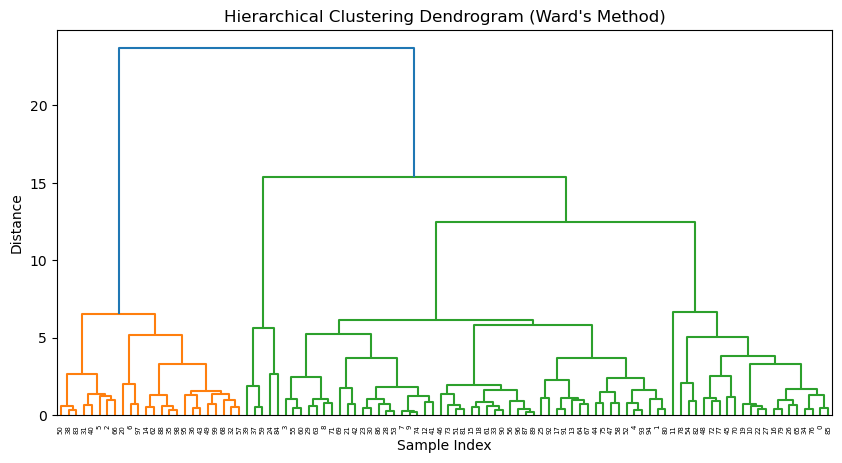

In [16]:
# Perform hierarchical clustering using Ward's method
linkage_matrix_ward = linkage(total_dist, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix_ward)
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

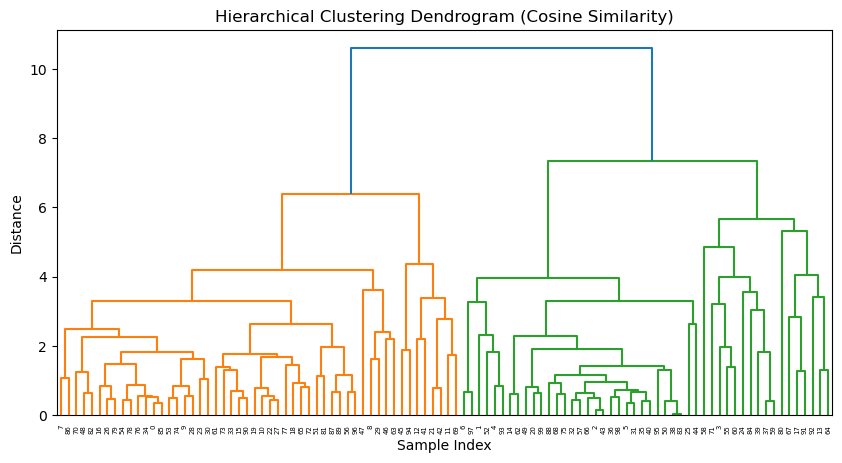

In [17]:
# Perform hierarchical clustering using Cosine similarity
linkage_matrix_cosine = linkage(cosine_dist, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix_cosine)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

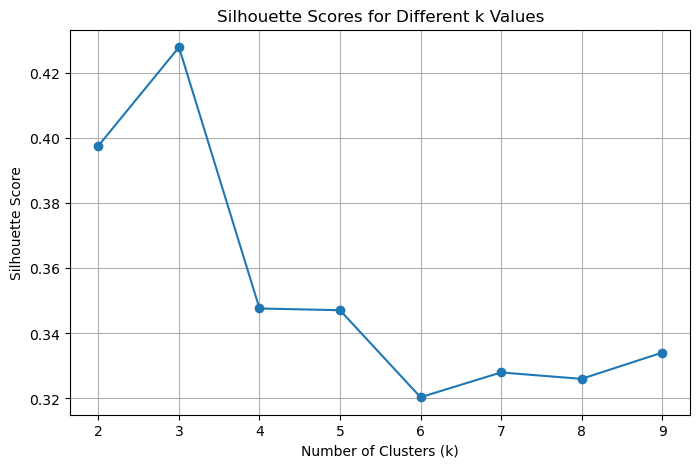

In [18]:
# Load PCA 3D data
pca_df = pd.read_csv("PCA/pca_3D_results.csv")

# Determine optimal K values using silhouette method
silhouette_scores = {}
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    silhouette_scores[k] = silhouette_score(pca_df, labels)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k Values")
plt.grid(True)
plt.show()

# Select three best K values
best_k_values = sorted(silhouette_scores, key=silhouette_scores.get, reverse=True)[:3]

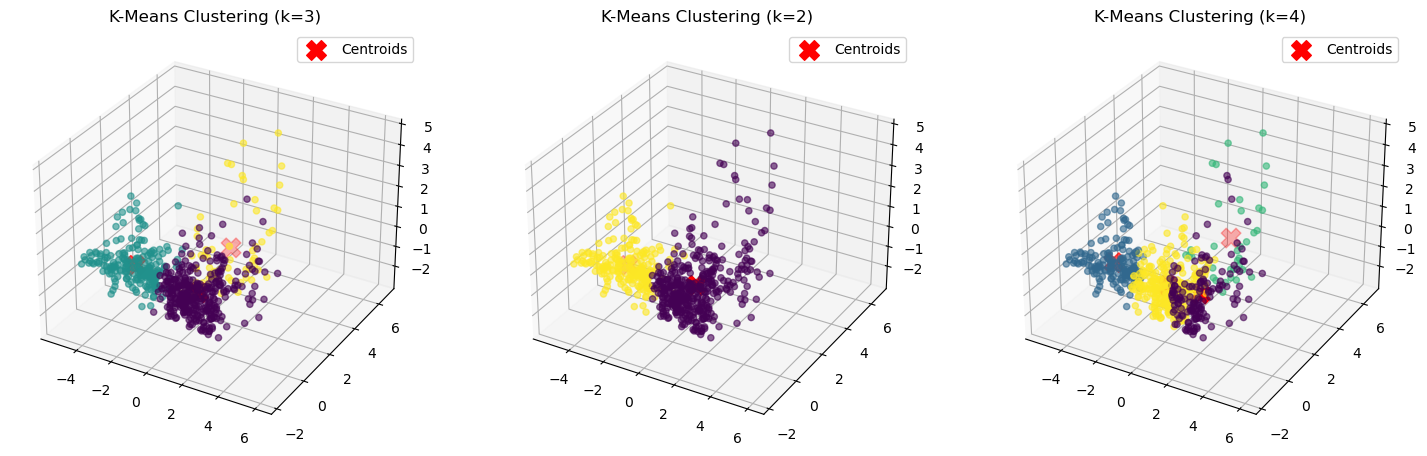

In [19]:
# Perform K-Means clustering with best K values
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
for ax, k in zip(axes, best_k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    centroids = kmeans.cluster_centers_
    
    # Plot clusters
    ax.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], pca_df.iloc[:, 2], c=labels, cmap='viridis', alpha=0.6)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.legend()
plt.show()

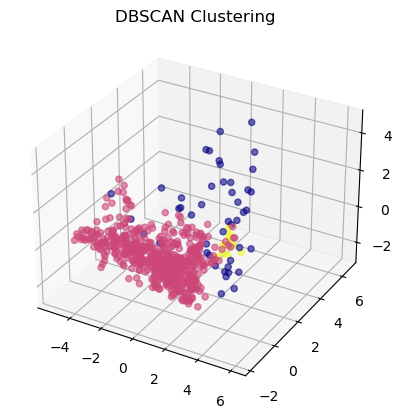

In [20]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.75, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

# Plot DBSCAN clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], pca_df.iloc[:, 2], c=dbscan_labels, cmap='plasma', alpha=0.6)
ax.set_title("DBSCAN Clustering")
plt.show()